In [31]:
import numpy as np
import pandas as pd
import calendar
from datetime import datetime
from sklearn.cross_validation import train_test_split
import seaborn as sns
import sklearn.metrics as rs
import matplotlib.pyplot as plt

In [32]:
dailydata=pd.read_csv('train.csv')

In [33]:
dailydata["date"] = dailydata.datetime.apply(lambda x : x.split()[0])
dailydata["hour"] = dailydata.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailydata["weekday"] = dailydata.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailydata["year"] = dailydata.datetime.apply(lambda x : x.split()[0].split("-")[0])
dailydata["month"] = dailydata.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
#Coerce the datatype of “season”,”holiday”,”workingday” and weather to categorical datatype.
dailydata["season"] = dailydata.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailydata["weather"] = dailydata.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [34]:
#Drop the "datetime" column
dailydata=dailydata.drop(["datetime"],axis=1)

In [35]:
#Coerce "hour","weekday","month","season","weather","holiday","workingday" to category type
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailydata[var] = dailydata[var].astype("category")

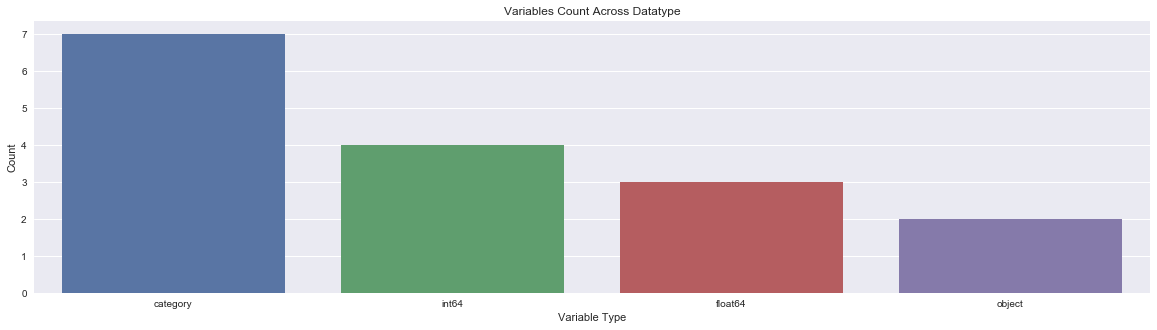

In [36]:
#Visualizing variables data tyes versus count
dataTypeDf = pd.DataFrame(dailydata.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")
plt.show()

In [37]:
dailydataWithoutOutliers = dailydata[np.abs(dailydata["count"]-dailydata["count"].mean())<=(3*dailydata["count"].std())]

In [38]:
mylist = list(dailydataWithoutOutliers.select_dtypes(include=['category']).columns)

In [39]:
dummies = pd.get_dummies(dailydataWithoutOutliers[mylist], prefix= mylist)

In [40]:
dailydataWithoutOutliers=dailydataWithoutOutliers.drop(mylist,axis=1)

In [41]:
X = pd.concat([dailydataWithoutOutliers,dummies], axis =1 )

In [42]:
X=X.drop(["date","registered","casual","atemp","windspeed"],axis=1)

In [43]:
X["year"]=X.year.map({"2011":0,"2012":1})

In [44]:
bins = [0,183,734]
labels = [0,1]
X['count_discrete'] = pd.cut(X['count'], bins=bins, labels=labels)

In [45]:
X["count_discrete"].value_counts()

0    6353
1    4386
Name: count_discrete, dtype: int64

In [46]:
X=X.drop(["count"], axis=1)

In [47]:
Y=X[['count_discrete']]

In [48]:
X=X.drop(["count_discrete"],axis=1)

In [49]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X)
minmaxscaler.transform(X)

array([[ 0.2244898 ,  0.81      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20408163,  0.8       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20408163,  0.8       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.32653061,  0.61      ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.32653061,  0.61      ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30612245,  0.66      ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(Y)
minmaxscaler.transform(Y)

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [51]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [52]:
from sklearn.tree import DecisionTreeClassifier
depth_tree=DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=10)

In [53]:
depth_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [54]:
x_train.head()

,temp,humidity,year,season_Fall,season_Spring,season_Summer,season_Winter,holiday_0,holiday_1,workingday_0,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
1920,18.86,72,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5013,13.12,53,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8804,27.06,94,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5157,9.84,70,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2740,28.70,58,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [55]:
x_test['prediction']=depth_tree.predict_proba(x_test)[:,1]

C:\Users\kvaishn3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
y_train.shape

(8591, 1)

In [57]:
dt_pred=depth_tree.predict_proba(x_train)
x_train['prediction']=dt_pred[:,1]
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
depth_tree2= DecisionTreeRegressor(criterion='mse', max_depth=2, min_samples_leaf=10)

C:\Users\kvaishn3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
for i in range(20):
 
    train_errorn= y_train['count_discrete'] - x_train['prediction']
    x_train2= x_train.drop(['prediction'], axis=1)
    x_test2= x_test.drop(['prediction'], axis=1)
    dt2=depth_tree2.fit(x_train2,train_errorn)
    dt_pred_train_errorn= dt2.predict(x_train2)
    x_train['prediction']=(x_train['prediction']+ dt_pred_train_errorn*0.5)
    train_auc=roc_auc_score(y_train, x_train['prediction'])
    print("AUC on training data set: "+ str(train_auc))
    dt_pred_test_errorn=dt2.predict(x_test2)
    x_test['prediction']=(x_test['prediction']+ dt_pred_test_errorn)
    test_auc=roc_auc_score(y_test, x_test['prediction'])
    print("AUC on test data set: "+ str(test_auc))

C:\Users\kvaishn3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kvaishn3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


AUC on training data set: 0.99086212474
AUC on test data set: 0.929978536603
AUC on training data set: 0.990885730489
AUC on test data set: 0.929783334511
AUC on training data set: 0.990919195439
AUC on test data set: 0.929882260458
AUC on training data set: 0.991084773707
AUC on test data set: 0.92965879381
AUC on training data set: 0.991121675294
AUC on test data set: 0.929481257066
AUC on training data set: 0.991230971598
AUC on test data set: 0.929127066846
AUC on training data set: 0.991239704035
AUC on test data set: 0.92912883338
AUC on training data set: 0.991500437692
AUC on test data set: 0.928393954918
AUC on training data set: 0.991500550369
AUC on test data set: 0.92840013779
AUC on training data set: 0.991598776197
AUC on test data set: 0.928328593132
AUC on training data set: 0.991717086629
AUC on test data set: 0.928197869559
AUC on training data set: 0.991774946065
AUC on test data set: 0.928311811051
AUC on training data set: 0.991815960348
AUC on test data set: 0.928